In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [4]:
insurance = pd.read_csv('C:\\Users\salig\OneDrive\Documents\DeGuzman_INSURANCE ACTIVITY\insurance - insurance.csv')

In [5]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [17]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# DISTRIBUTION


In [6]:
sex_dist = insurance["sex"].value_counts(normalize=True) *100

In [8]:
sex_dist

male      50.523169
female    49.476831
Name: sex, dtype: float64

In [9]:
bmi_dist = insurance["bmi"].value_counts(normalize=True) *100

In [10]:
bmi_dist

32.300    0.971599
28.310    0.672646
30.495    0.597907
30.875    0.597907
31.350    0.597907
            ...   
46.200    0.074738
23.800    0.074738
44.770    0.074738
32.120    0.074738
30.970    0.074738
Name: bmi, Length: 548, dtype: float64

# AVERAGE BMI BASED ON SEX

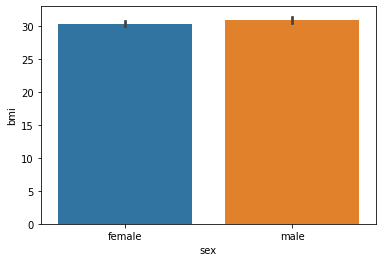

In [11]:
visual1 = sns.barplot(data = insurance, x="sex", y="bmi")

In [12]:
insurance[insurance["sex"]=="male"]["bmi"]

1       33.770
2       33.000
3       22.705
4       28.880
8       29.830
         ...  
1324    25.935
1325    33.535
1327    30.030
1329    38.600
1333    30.970
Name: bmi, Length: 676, dtype: float64

In [13]:
first, p_value = f_oneway(insurance[insurance["sex"]=="male"]["bmi"],insurance[insurance["sex"]=="female"]["bmi"])

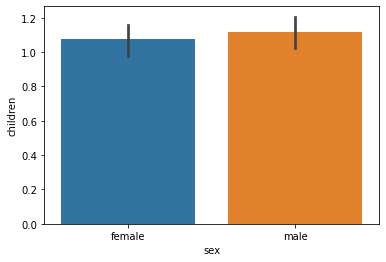

In [14]:
visual2 = sns.barplot(data=insurance, x="sex", y="children")

In [15]:
insurance[insurance["sex"]=="female"]["bmi"]

0       27.90
5       25.74
6       33.44
7       27.74
9       25.84
        ...  
1332    44.70
1334    31.92
1335    36.85
1336    25.80
1337    29.07
Name: bmi, Length: 662, dtype: float64

In [16]:
first, p_value2 = f_oneway(insurance[insurance["sex"]=="male"]["bmi"],insurance[insurance["sex"]=="female"]["bmi"])

# WHAT SEX IS OFTEN WHO SMOKE CIGARETTES AND GOT INSURANCE CHARGES?


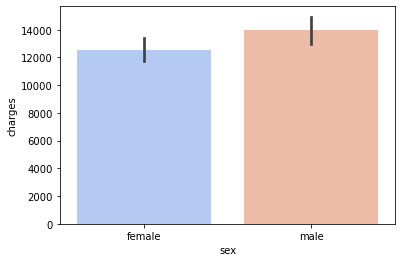

In [23]:
gsurance = sns.barplot(data = insurance, x = "sex", y = "charges", palette='coolwarm')

# ARE THE CHARGES OF INSURANCE  HAS A CORRELATION TO SEX, WHEN IT REGARDS TO SMOKING CIGARETTES?

In [24]:
first, p_value = f_oneway(insurance[insurance["sex"]=="male"]["charges"],insurance[insurance["sex"]=="female"]["charges"])

In [25]:
print(p_value)

if p_value >= 0.5:
    print("Sex does have a correlation to the insurance charges")
else:
    print("Sex doesn't have a correlation to the insurance charges")

0.03613272100596256
Sex doesn't have a correlation to the insurance charges


# WHAT SEX IS OFTEN WHO SMOKE CIGARETTES?

In [26]:
sex_tots = insurance['sex'].value_counts()
most_smoker = sex_tots.idxmax()
num_of_smoker = sex_tots.max()

print("The sex that smokes the most is:", most_smoker)
print("With a total count of:", num_of_smoker)

The sex that smokes the most is: male
With a total count of: 676


# HAS THE MOST NUMBER OF CHILDREN AND IN WHAT REGION CAME FROM?

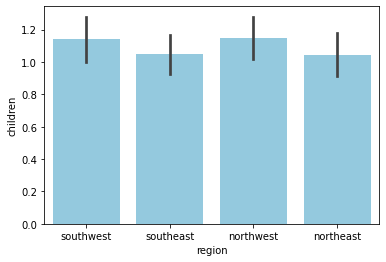

In [28]:
Cregion = sns.barplot(data = insurance, x = "region", y ="children", color = "skyblue")
plt.show()

# WHEN IT COMES TO AGE, IS YOUNGER PEOPLE/AGE ARE STILL PAYING INSURANCE FOR THEIR FUTURE HOLDS?

In [30]:
young = insurance.groupby("charges")["age"].mean().reset_index()

youngest = young.sort_values(by="age", ascending=False).iloc[0]
print("The youngest insurance payer:", youngest["age"], "years old")


The youngest insurance payer: 64.0 years old


# HAS THE MOST OBESITY WHEN IT CAME FROM? FROM WHAT REGION IS IT?

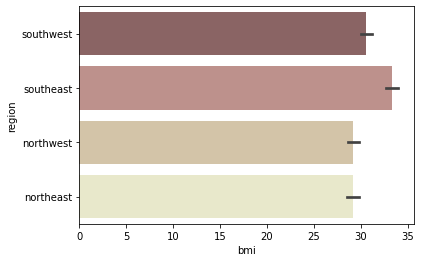

In [37]:
Rbmi= sns.barplot(data = insurance, x = "bmi", y = "region",palette='pink')

# DOES SMOKER AND AGE HAS A CORRELATION? AND WHAT AGES IS IT?

In [33]:
first, p_value1 = f_oneway(insurance[insurance["smoker"]=="yes"]["age"],insurance[insurance["smoker"]=="no"]["age"])

In [34]:
print(p_value1)

if p_value >= 0.5:
    print("Being smoker does have a correlation to the age")
else:
    print("Being smoker doesn't have a correlation to the age")

0.36048529037786103
Being smoker doesn't have a correlation to the age


# IN FEMALE AND MALE WHAT SEX HAS THE MOST OBESITY?

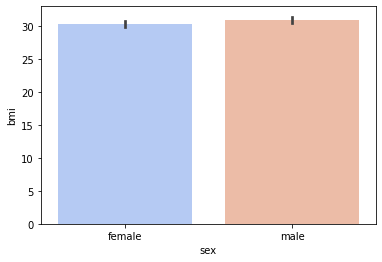

In [42]:
s_bmi = sns.barplot(data = insurance, x = "sex", y = "bmi", palette="coolwarm")
plt.show()

# INSURANCE PAYER HAS NO KIDS/CHILDREN?

In [43]:
zero_chil =(insurance["children"] == 0).value_counts()
free_chil = zero_chil.max()
print("The total number of a insurance payer that doesnt have a kid is:", free_chil)

The total number of a insurance payer that doesnt have a kid is: 764


# BASED ON THE INSURANCE EXCEL FILE. HOW MANY SMOKERS THEY HAVE?

In [44]:
a_smoker = (insurance["smoker"] == "yes").value_counts()
y_smoke = a_smoker.max()
print("The total number of smoker is:", y_smoke)

The total number of smoker is: 1064


# WHAT IS THE HIGHEST AND LOWEST CHARGES, WHEN IT COMES TO WHO SMOKES THE MOST?

In [46]:
highcharge = insurance.loc[insurance['charges'].idxmax()]

lowcharge = insurance.loc[insurance['charges'].idxmin()]

print("The highest charges is:", highcharge)
print("While the lowest is:", lowcharge)

The highest charges is: age                  54
sex              female
bmi               47.41
children              0
smoker              yes
region        southeast
charges     63770.42801
Name: 543, dtype: object
While the lowest is: age                18
sex              male
bmi             23.21
children            0
smoker             no
region      southeast
charges     1121.8739
Name: 940, dtype: object


# GENERAL AVERAGE OF SMOKING CIGARETES?


In [48]:
avg_smoker = insurance.groupby("smoker")["age"].mean().reset_index()

tots_smoker = avg_smoker.sort_values(by="age", ascending=False).iloc[0]
print("The general average age of a smoker is:", tots_smoker["age"], "years old")


The general average age of a smoker is: 39.38533834586466 years old


# HAS THE HIGHEST AND LEAST CHARGES, WHEN IT CAME FROM? FROM WHAT REGION IT IS?

<function matplotlib.pyplot.show(close=None, block=None)>

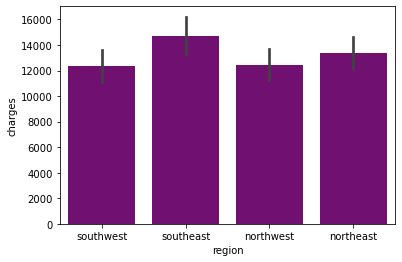

<Figure size 1152x1584 with 0 Axes>

In [53]:
Rsmoker = sns.barplot(data = insurance, x = "region", y = "charges", color = "purple")
plt.figure(figsize=(16,22))
plt.show

# WHEN IT COMES TO THE REGION, WHAT HAS THE LOWEST NUMBER IS NOT REALLY INTO INSURANCE PAYER?

In [54]:
reg_dist = insurance["region"].value_counts() 
a=reg_dist.idxmin()
b=reg_dist.min()
print("The region that avail insurance the lowest is:", a)
print("With the total of:", b)

The region that avail insurance the lowest is: northeast
With the total of: 324


# HOW MANY MALES ARE CHILD FREE?

In [56]:
tots = len(insurance[(insurance["sex"] == "male") & (insurance["children"] == 0)])
print("Number of males without children:", tots)

Number of males without children: 285
